In [1]:
import json
import os
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
#import squarify
from functools import reduce
path = """C:\\Users\\Koushik\\Downloads\\open-data-master\\open-data-master\\data\\my_events\\"""
Xg_req = pd.DataFrame(data=None)
for filename in (os.listdir(path)):
    #print(filename)
    
    with open("%s" % path + filename,encoding="utf8") as data_file:    
        data = json.load(data_file)
        df = pd.DataFrame(data=None)
        
        df = json_normalize(data, sep = "_")
        
        #df =  df[(df['type_name'] == "Shot")]
        #df = df.loc[:,['location','shot_body_part_id','shot_end_location','shot_one_on_one','shot_technique_id','shot_type_id','under_pressure','shot_outcome_id']]
        #print(df.shape)
    Xg_req = Xg_req.append(df,ignore_index=True,sort=False)
        #df.drop(df.index, inplace=True)
        
print("done")
df = Xg_req

done


In [13]:
through_ball = df.query('pass_through_ball == True')

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
            ...    
179346          NaN
179347          NaN
179348          NaN
179349          NaN
179350          NaN
179351          NaN
179352          NaN
179353          NaN
179354          NaN
179355          NaN
179356          NaN
179357          NaN
179358          NaN
179359          NaN
179360          NaN
179361          NaN
179362          NaN
179363          NaN
179364          NaN


In [14]:
assist = df.query('pass_goal_assist == True')
print(len(assist.index))
goal = assist.query('shot_outcome_id == 97')
#assist = df.query('pass_goal_assist == True')
print(len(goal.index))

30
0


In [4]:
through_ball= through_ball[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
through_ball.head()

,id,period,timestamp,location,pass_end_location,pass_recipient_name
27,95ffe924-77f3-40e2-afc6-23e5fed8865f,1,00:00:38.660,"[44.0, 17.0]","[95.0, 23.0]",Francesca Kirby
257,ce817472-51c1-4b9a-89d5-2b929f422b2e,1,00:08:03.753,"[89.0, 65.0]","[116.0, 55.0]",Nikita Parris
623,cf2ed5ec-1d2f-4746-a482-4ff7a1823adf,1,00:19:30.020,"[39.0, 38.0]","[96.0, 42.0]",Ramona Bachmann
1574,898b1dba-d2e6-431c-b830-4d897c946ad2,2,00:01:56.558,"[41.0, 79.0]","[101.0, 47.0]",Ramona Bachmann
3292,7799fb29-209f-4b3a-a73e-2c35f9d83c51,1,00:09:35.360,"[74.0, 48.0]","[98.0, 32.0]",Mallory Weber


In [15]:
assist= assist[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
assist.head()

,id,period,timestamp,location,pass_end_location,pass_recipient_name
199,c547c736-4bf5-484f-9360-463abb19e465,1,00:05:45.020,"[104.0, 36.0]","[109.0, 29.0]",Millie Bright
746,e3eca08d-7c54-4c65-a19a-faa9708225b5,1,00:23:20.340,"[111.0, 24.0]","[111.0, 35.0]",So-yun Ji
1649,d48d70cf-3464-40c9-80c0-f81d7ce46b25,2,00:03:39.570,"[108.0, 5.0]","[115.0, 43.0]",Nikita Parris
2739,7f1fe749-1914-4f5d-8f0b-62c7c9f79196,2,00:40:33.251,"[109.0, 48.0]","[97.0, 46.0]",Georgia Stanway
63663,59c55828-1423-4cf5-aef4-58f0cab1d9fe,2,00:06:57.202,"[81.0, 28.0]","[87.0, 36.0]",Hayley Raso


In [6]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

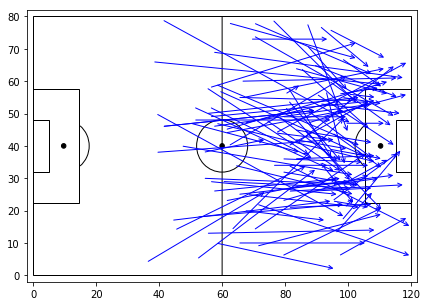

In [8]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
#plt.plot(x_axis,y_axis,'ro')
#plt.plot(x,y,'bo')
#plt.axis('off')

for i in range(len(through_ball)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (through_ball.iloc[i]['pass_end_location'][0], through_ball.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (through_ball.iloc[i]['location'][0], through_ball.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
"""
for i in range(len(assist)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (assist.iloc[i]['pass_end_location'][0], assist.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (assist.iloc[i]['location'][0], assist.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"),)
"""

plt.show()

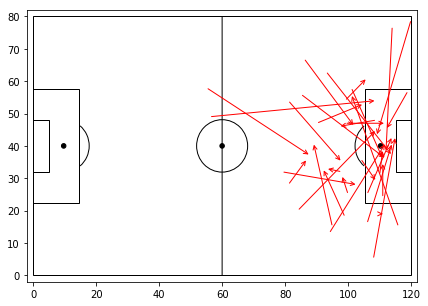

In [16]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
#plt.plot(x_axis,y_axis,'ro')
#plt.plot(x,y,'bo')
#plt.axis('off')

for i in range(len(assist)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (assist.iloc[i]['pass_end_location'][0], assist.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (assist.iloc[i]['location'][0], assist.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"),)

plt.show()    